# Exploring the use of exogenous variables with Arima

In [1]:
import darts

from darts.models import (
    ARIMA,
    AutoARIMA
)
from darts import TimeSeries
import pandas as pd
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.metrics import mape
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


## Load and process data

In [2]:
df_air = pd.read_csv('AirPassengers.csv', delimiter=',')
series_air = TimeSeries.from_dataframe(df_air, 'Month', ['#Passengers'])

In [3]:
scaler_air= Scaler()
series_air_scaled = scaler_air.fit_transform(series_air)

# build year and month series:
air_year = datetime_attribute_timeseries(series_air_scaled, attribute='year')
air_month = datetime_attribute_timeseries(series_air_scaled, attribute='month')

# stack year and month to obtain series of 2 dimensions (year and month):
air_covariates = air_year.stack(air_month)

In [4]:
train_air, val_air = series_air_scaled[:-36], series_air_scaled[-36:]
train_air

                   0
Month               
1949-01-01  0.015444
1949-02-01  0.027027
1949-03-01  0.054054
1949-04-01  0.048263
1949-05-01  0.032819
...              ...
1957-08-01  0.700772
1957-09-01  0.579151
1957-10-01  0.469112
1957-11-01  0.388031
1957-12-01  0.447876

[108 rows x 1 columns]
Freq: MS

In [5]:
air_train_covariates, air_val_covariates = air_covariates[:-36], air_covariates[-36:]
air_train_covariates

               0   1
Month               
1949-01-01  1949   1
1949-02-01  1949   2
1949-03-01  1949   3
1949-04-01  1949   4
1949-05-01  1949   5
...          ...  ..
1957-08-01  1957   8
1957-09-01  1957   9
1957-10-01  1957  10
1957-11-01  1957  11
1957-12-01  1957  12

[108 rows x 2 columns]
Freq: MS

## Models

### Univariate model

In [6]:
model = ARIMA()

/Users/camilawilliamson/git/darts-env/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/camilawilliamson/git/darts-env/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/Users/camilawilliamson/git/darts-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:1866: RuntimeWarning: invalid value encountered in sqrt
  fcerr = np.sqrt(np.cumsum(cumsum_n(ma_rep, self.k_diff) ** 2) * sigma2)


5.430608655561312

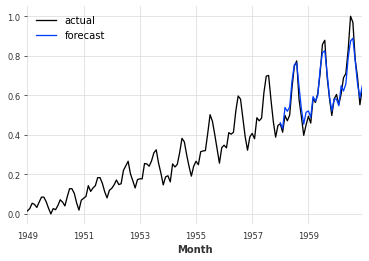

In [7]:
model.fit(train_air)
preds = model.predict(36)

series_air_scaled.plot(label='actual')
preds.plot(label='forecast')
plt.legend()

mape(val_air, preds)

## Multivariate models

#### Univariate covariate

/Users/camilawilliamson/git/darts-env/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/camilawilliamson/git/darts-env/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


5.303162114007497

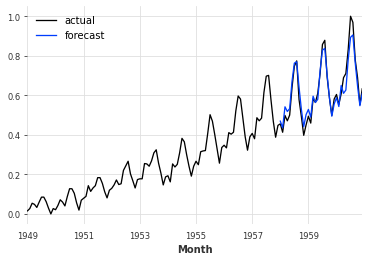

In [8]:
model.fit(train_air, covariates=air_train_covariates['1'])
preds = model.predict(36, covariates=air_val_covariates['1'])

series_air_scaled.plot(label='actual')
preds.plot(label='forecast')
plt.legend()

mape(val_air, preds)

Note: In this case we don't need to pass the series argument to predict

#### Multivariate covariates

/Users/camilawilliamson/git/darts-env/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/camilawilliamson/git/darts-env/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


9.465305029986876

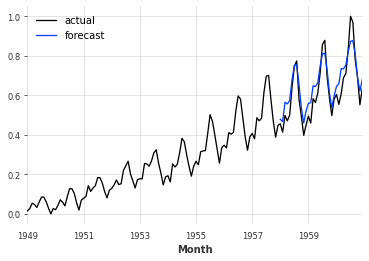

In [10]:
model.fit(train_air, covariates=air_train_covariates)
preds = model.predict(36, covariates=air_val_covariates)

series_air_scaled.plot(label='actual')
preds.plot(label='forecast')
plt.legend()

mape(val_air, preds)

##### Test case in which time indices do not match, but length matches

In [11]:
model.fit(train_air[1:], covariates=air_train_covariates[:-1])
preds = model.predict(36, covariates=air_val_covariates)

series_air_scaled.plot(label='actual')
preds.plot(label='forecast')
plt.legend()

mape(val_air, preds)

[2021-01-27 19:12:50,799] ERROR | main_logger | ValueError: The target series and the covariates series must have the same time index.
[2021-01-27 19:12:50,799] ERROR | main_logger | ValueError: The target series and the covariates series must have the same time index.
[2021-01-27 19:12:50,799] ERROR | main_logger | ValueError: The target series and the covariates series must have the same time index.
[2021-01-27 19:12:50,799] ERROR | main_logger | ValueError: The target series and the covariates series must have the same time index.


ValueError: The target series and the covariates series must have the same time index.

##### Test case in which time indices do not match, nor length matches

In [12]:
model.fit(train_air, covariates=air_train_covariates[:-1])
preds = model.predict(36, covariates=air_val_covariates)

series_air_scaled.plot(label='actual')
preds.plot(label='forecast')
plt.legend()

mape(val_air, preds)

[2021-01-27 19:13:23,766] ERROR | main_logger | ValueError: The target series and the covariates series must have the same time index.
[2021-01-27 19:13:23,766] ERROR | main_logger | ValueError: The target series and the covariates series must have the same time index.
[2021-01-27 19:13:23,766] ERROR | main_logger | ValueError: The target series and the covariates series must have the same time index.
[2021-01-27 19:13:23,766] ERROR | main_logger | ValueError: The target series and the covariates series must have the same time index.


ValueError: The target series and the covariates series must have the same time index.

##### Test case in which the lenght of covariates is not the same as the forecasting horizon

In [13]:
model.fit(train_air, covariates=air_train_covariates)
preds = model.predict(36, covariates=air_val_covariates[:-1])

series_air_scaled.plot(label='actual')
preds.plot(label='forecast')
plt.legend()

mape(val_air, preds)

/Users/camilawilliamson/git/darts-env/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/camilawilliamson/git/darts-env/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
[2021-01-27 19:13:32,894] ERROR | main_logger | ValueError: Expecting covariates with the same length as the forecasting horizon (36).
[2021-01-27 19:13:32,894] ERROR | main_logger | ValueError: Expecting covariates with the same length as the forecasting horizon (36).
[2021-01-27 19:13:32,894] ERROR | main_logger | ValueError: Expecting covariates with the same length as the forecasting horizon (36).
[2021-01-27 19:13:32,894] ERROR | main_logger | ValueError: Expecting covariates with the same length as the f

ValueError: Expecting covariates with the same length as the forecasting horizon (36).

#### Multivariate covariates and multivariates target

In [14]:
model.fit(air_train_covariates, covariates=air_train_covariates)
preds = model2.predict(36, covariates=air_val_covariates)

ValueError: endog is required to have ndim 1 but has ndim 2